# 1. Load the Dataset

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ["Numbers","entity", "sentiment", "content"]

df.head()


,Numbers,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# 2. Sentiment Distribution

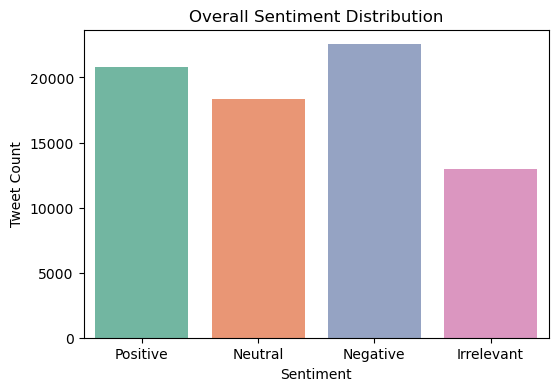

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()


# 3. Most Discussed Entities

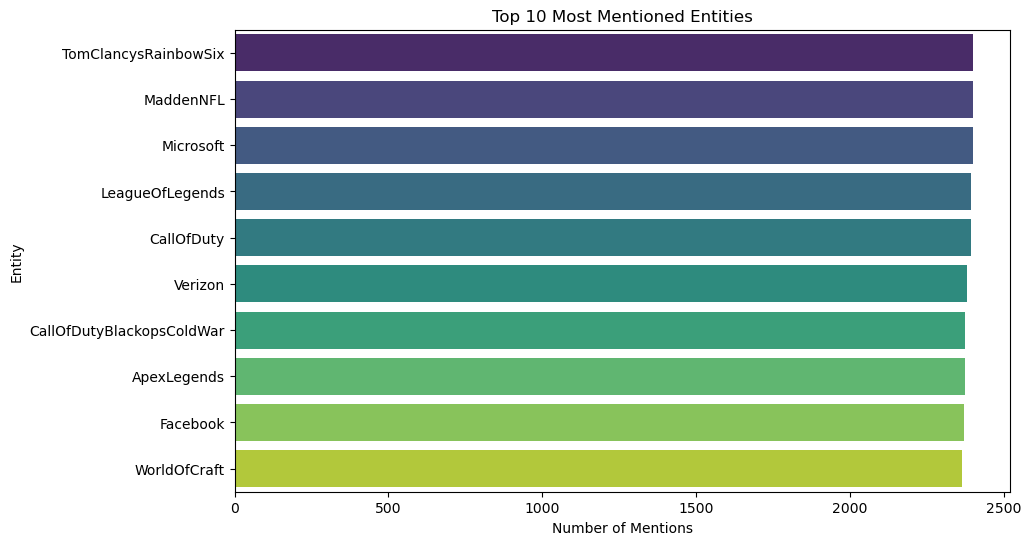

In [5]:
top_entities = df['entity'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_entities.values, y=top_entities.index, palette='viridis')
plt.title('Top 10 Most Mentioned Entities')
plt.xlabel('Number of Mentions')
plt.ylabel('Entity')
plt.show()


# 4. Entity-wise Sentiment Breakdown

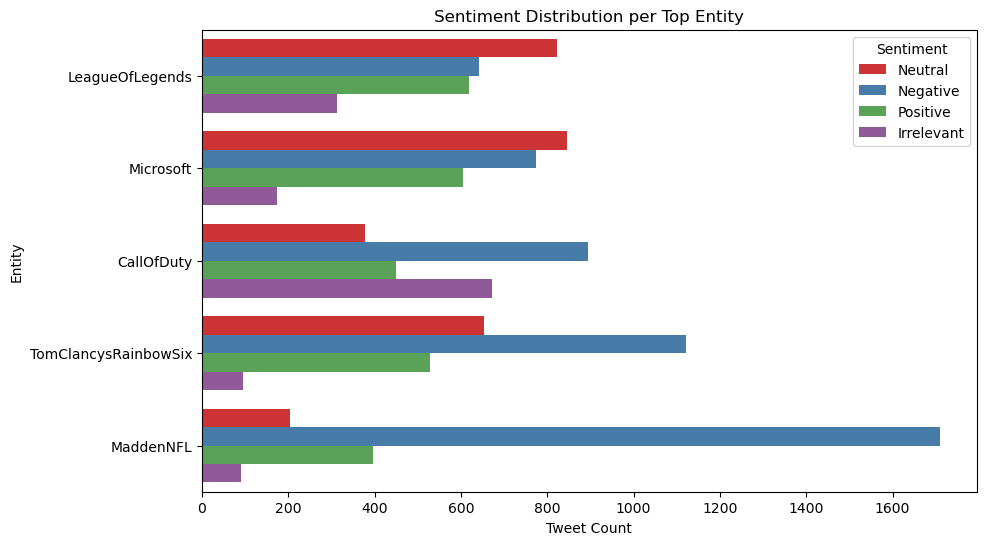

In [6]:
# Pick top 5 entities
top_entities = df['entity'].value_counts().head(5).index.tolist()
subset = df[df['entity'].isin(top_entities)]

plt.figure(figsize=(10,6))
sns.countplot(data=subset, y='entity', hue='sentiment', palette='Set1')
plt.title('Sentiment Distribution per Top Entity')
plt.xlabel('Tweet Count')
plt.ylabel('Entity')
plt.legend(title='Sentiment')
plt.show()


# 5. Word Cloud for Positive Sentiment

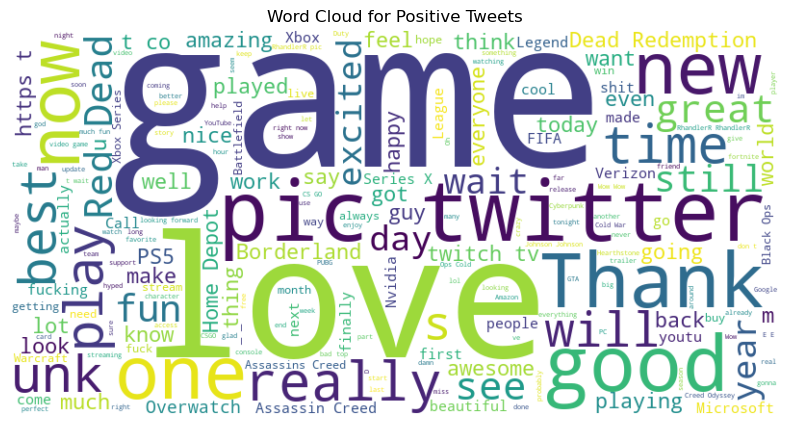

In [8]:
from wordcloud import WordCloud

# Filter and clean positive tweets
positive_tweets_series = df[df['sentiment'] == 'Positive']['content'].dropna()
positive_tweets_series = positive_tweets_series.astype(str)  # Convert all to strings

# Combine into one large string
positive_tweets = " ".join(positive_tweets_series)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Tweets")
plt.show()


# 6. Word Cloud for Negative Sentiment

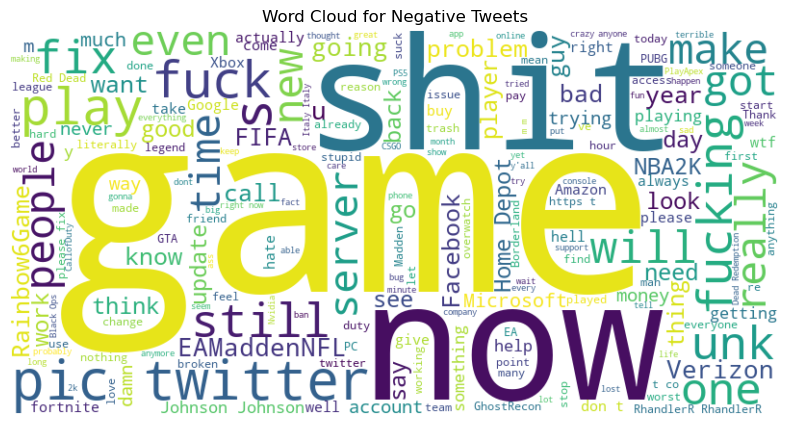

In [10]:
from wordcloud import WordCloud

# Filter and clean positive tweets
positive_tweets_series = df[df['sentiment'] == 'Negative']['content'].dropna()
positive_tweets_series = positive_tweets_series.astype(str)  # Convert all to strings

# Combine into one large string
positive_tweets = " ".join(positive_tweets_series)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Tweets")
plt.show()
